## Practica 5: Linear Models + correlation

Genere un modelo lineal a partir de sus datos, cree los gráficos necesarios y obtenga su puntuación R2.

### Lectura del CSV

In [19]:
import pandas as pd

df = pd.read_csv("datos_limpios.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93000 entries, 0 to 92999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Booking ID       93000 non-null  object 
 1   Booking Status   93000 non-null  object 
 2   Customer ID      93000 non-null  object 
 3   Vehicle Type     93000 non-null  object 
 4   Pickup Location  93000 non-null  object 
 5   Drop Location    93000 non-null  object 
 6   Avg VTAT         93000 non-null  float64
 7   Avg CTAT         93000 non-null  float64
 8   Booking Value    93000 non-null  float64
 9   Ride Distance    93000 non-null  float64
 10  Driver Ratings   93000 non-null  float64
 11  Customer Rating  93000 non-null  float64
 12  Payment Method   93000 non-null  object 
 13  Datetime         93000 non-null  object 
dtypes: float64(6), object(8)
memory usage: 9.9+ MB


### Modelo lineal

Excluimos columnas que no tendrán relevancia futura

In [20]:
columnas = ["Booking ID", "Booking Status", "Customer ID"]
df.drop(columns = columnas, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93000 entries, 0 to 92999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vehicle Type     93000 non-null  object 
 1   Pickup Location  93000 non-null  object 
 2   Drop Location    93000 non-null  object 
 3   Avg VTAT         93000 non-null  float64
 4   Avg CTAT         93000 non-null  float64
 5   Booking Value    93000 non-null  float64
 6   Ride Distance    93000 non-null  float64
 7   Driver Ratings   93000 non-null  float64
 8   Customer Rating  93000 non-null  float64
 9   Payment Method   93000 non-null  object 
 10  Datetime         93000 non-null  object 
dtypes: float64(6), object(5)
memory usage: 7.8+ MB


Conversión de datetime a formato correcto

In [21]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Day'] = df['Datetime'].dt.dayofweek
df['Hour'] = df['Datetime'].dt.hour
df['Weekend'] = np.where(df['Day'].isin([5, 6]), 1, 0) # 1 -> weekend

Creación del Modelo lineal

In [22]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [62]:
def linear_model(df, X_cols_categorical, X_cols_numerical):
  X = df[X_cols_categorical + X_cols_numerical]
  y = df["Booking Value"]

  X_encoded = pd.get_dummies(X, columns=X_cols_categorical, drop_first=True)

  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  return y_test, y_pred

In [56]:
X_cols_categorical = ["Vehicle Type", "Pickup Location", "Drop Location", "Day", "Hour", "Weekend"]
X_cols_numerical = ["Ride Distance"]

y_test, y_pred = linear_model(X_cols_categorical, X_cols_numerical)

print(f"R2 score: {r2_score(y_test, y_pred):.4f}")

R2 score: 0.0505


Un coeficiente de determinación de 0.05 no es exactamente bueno, así que vamos a cambiar algunas cosas. Por ejemplo, disminuir las variables independientes, eliminando Pickup Location y Drop Location

In [57]:
X_cols2_categorical = ["Vehicle Type", "Day", "Hour", "Weekend"]
X_cols2_numerical = ["Ride Distance"]
y_test2, y_pred2 = linear_model(df, X_cols2_categorical, X_cols2_numerical)

print(f"R2 score: {r2_score(y_test2, y_pred2):.4f}")

R2 score: 0.0551


Si eliminamos Vehicle Type

In [63]:
X_cols3_categorical = ["Day", "Hour", "Weekend"]
X_cols3_numerical = ["Ride Distance"]
y_test3, y_pred3 = linear_model(df, X_cols3_categorical, X_cols3_numerical)

print(f"R2 score: {r2_score(y_test3, y_pred3):.4f}")

R2 score: 0.0553


No existe relación lineal.

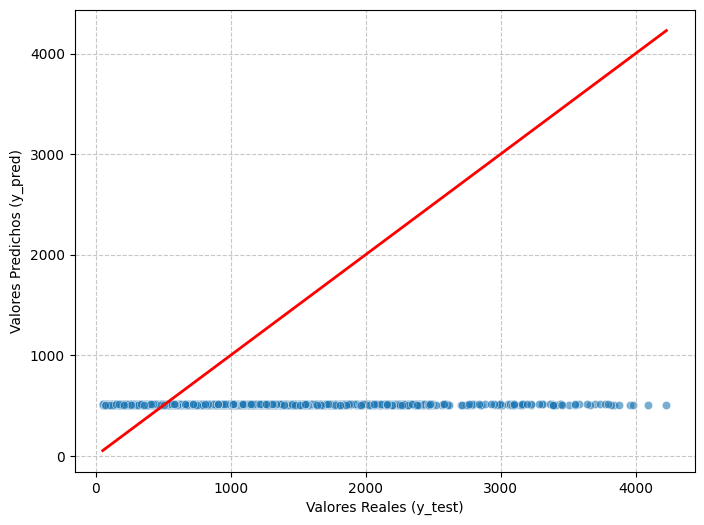

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()